In [1]:
#df = tree.pandas.df(tree.keys(),flatten=False)
#lep_pt = df['lep_pt'].to_numpy()
#lep_eta = df['lep_eta'].to_numpy()
#lep_phi = df['lep_phi'].to_numpy()
#jet_E = df['jet_E'].to_numpy()
#ditau_m = df['ditau_m'].to_numpy()
#lep_n = df['lep_n'].to_numpy()
#lep_charge = df['lep_charge'].to_numpy()
#filter_m_square_lepton = []
#for i in range(len(m_square_lepton_list)):
    #if m_square_lepton_list[i] > 0 and 1e8 < m_square_lepton_list[i] < 1e10:
        #filter_m_square_lepton.append(m_square_lepton_list[i])
#filter_m_square_anti_lepton = []
#for i in range(len(m_square_anti_lepton_list)):
    #if m_square_anti_lepton_list[i] > 0 and 1e8 < m_square_lepton_list[i] < 1e10:
        #filter_m_square_anti_lepton.append(m_square_anti_lepton_list[i])

#   $H\longrightarrow W^{*}W$

In [2]:
import time
import math
import os
import numpy as np
import pandas as pd
import ROOT
import uproot
import matplotlib.pyplot as plt
import matplotlib
import root_numpy
from root_numpy import array

Welcome to JupyROOT 6.20/06


In [3]:
dataA = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_A.2lep.root")
dataB = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_B.2lep.root")
dataC = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_C.2lep.root")
dataD = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/Data/data_D.2lep.root")

In [4]:
print(dataA.keys())
print(dataB.keys())
print(dataC.keys())
print(dataD.keys())

[b'mini;1']
[b'mini;1']
[b'mini;1']
[b'mini;1']


In [5]:
treeA = dataA['mini']
treeB = dataB['mini']
treeC = dataC['mini']
treeD = dataD['mini']

In [6]:
treeA.keys()

[b'runNumber',
 b'eventNumber',
 b'channelNumber',
 b'mcWeight',
 b'scaleFactor_PILEUP',
 b'scaleFactor_ELE',
 b'scaleFactor_MUON',
 b'scaleFactor_PHOTON',
 b'scaleFactor_TAU',
 b'scaleFactor_BTAG',
 b'scaleFactor_LepTRIGGER',
 b'scaleFactor_PhotonTRIGGER',
 b'trigE',
 b'trigM',
 b'trigP',
 b'lep_n',
 b'lep_truthMatched',
 b'lep_trigMatched',
 b'lep_pt',
 b'lep_eta',
 b'lep_phi',
 b'lep_E',
 b'lep_z0',
 b'lep_charge',
 b'lep_type',
 b'lep_isTightID',
 b'lep_ptcone30',
 b'lep_etcone20',
 b'lep_trackd0pvunbiased',
 b'lep_tracksigd0pvunbiased',
 b'met_et',
 b'met_phi',
 b'jet_n',
 b'jet_pt',
 b'jet_eta',
 b'jet_phi',
 b'jet_E',
 b'jet_jvt',
 b'jet_trueflav',
 b'jet_truthMatched',
 b'jet_MV2c10',
 b'photon_n',
 b'photon_truthMatched',
 b'photon_trigMatched',
 b'photon_pt',
 b'photon_eta',
 b'photon_phi',
 b'photon_E',
 b'photon_isTightID',
 b'photon_ptcone30',
 b'photon_etcone20',
 b'photon_convType',
 b'tau_n',
 b'tau_pt',
 b'tau_eta',
 b'tau_phi',
 b'tau_E',
 b'tau_isTightID',
 b'tau_tru

In [7]:
trigPA = np.array(treeA.array(['trigP']))
trigPB = np.array(treeB.array(['trigP']))
trigPC = np.array(treeC.array(['trigP']))
trigPD = np.array(treeD.array(['trigP']))

In [8]:
print(trigPA.shape)
print(trigPB.shape)
print(trigPC.shape)
print(trigPD.shape)

(668152,)
(2459370,)
(3587872,)
(5490396,)


In [9]:
lep_pt = np.array(treeA.array(['lep_pt']))
lep_phi = np.array(treeA.array(['lep_phi']))
lep_E = np.array(treeA.array(['lep_E']))
lep_eta = np.array(treeA.array(['lep_eta'])) 
lep_charge = np.array(treeA.array(['lep_charge'])) 

In [10]:
lep_pt_new_lepton = []
for i in range(len(lep_pt)):
    lep_pt_new_lepton.append(lep_pt[i][0])

lep_pt_new_anti_lepton = []
for i in range(len(lep_pt)):
    lep_pt_new_anti_lepton.append(lep_pt[i][1])

In [11]:
lep_phi_new_lepton = []
for i in range(len(lep_phi)):
    lep_phi_new_lepton.append(lep_phi[i][0])
    
lep_phi_new_anti_lepton = []
for i in range(len(lep_phi)):
    lep_phi_new_anti_lepton.append(lep_phi[i][1])

filter_lep_phi_new_lepton = []
for i in range(len(lep_phi)):
    if 0 < lep_phi_new_lepton[i] < 1.8:
        filter_lep_phi_new_lepton.append(lep_phi_new_lepton[i])
        
filter_lep_phi_new_anti_lepton = []
for i in range(len(lep_phi)):
    if 0 < lep_phi_new_anti_lepton[i] < 1.8:
        filter_lep_phi_new_anti_lepton.append(lep_phi_new_anti_lepton[i])

In [12]:
print("Number of data in lep_phi for the lepton case: " + str(len(lep_phi_new_lepton)))
print("Number of data in lep_phi for the anti-lepton case: " + str(len(lep_phi_new_lepton)))
print("Number of filter data in lep_phi for the lepton case: " + str(len(filter_lep_phi_new_lepton)))
print("Number of filter data in lep_phi for the anti-lepton case: " + str(len(filter_lep_phi_new_anti_lepton)))

Number of data in lep_phi for the lepton case: 668152
Number of data in lep_phi for the anti-lepton case: 668152
Number of filter data in lep_phi for the lepton case: 191944
Number of filter data in lep_phi for the anti-lepton case: 190961


In [13]:
lep_E_new_lepton = []
for i in range(len(lep_E)):
    lep_E_new_lepton.append(lep_E[i][0])

lep_E_new_anti_lepton = []
for i in range(len(lep_E)):
    lep_E_new_anti_lepton.append(lep_E[i][1])

In [14]:
lep_eta_new_lepton = []
for i in range(len(lep_eta)):
    lep_eta_new_lepton.append(lep_eta[i][0])

lep_eta_new_anti_lepton = []
for i in range(len(lep_eta)):
    lep_eta_new_anti_lepton.append(lep_eta[i][1])

In [15]:
lep_pt_new_lepton_numpy = np.array(lep_pt_new_lepton)
lep_pt_new_anti_lepton_numpy = np.array(lep_pt_new_anti_lepton)
#
lep_phi_new_lepton_numpy = np.array(lep_phi_new_lepton)
lep_phi_new_anti_lepton_numpy = np.array(lep_phi_new_anti_lepton)
filter_lep_phi_new_lepton_numpy = np.array(filter_lep_phi_new_lepton)
filter_lep_phi_new_anti_lepton_numpy = np.array(filter_lep_phi_new_anti_lepton)
#
lep_E_new_lepton_numpy = np.array(lep_E_new_lepton)
lep_E_new_anti_lepton_numpy = np.array(lep_E_new_anti_lepton)
#
lep_eta_new_lepton_numpy = np.array(lep_eta_new_lepton)
lep_eta_new_anti_lepton_numpy = np.array(lep_eta_new_anti_lepton)

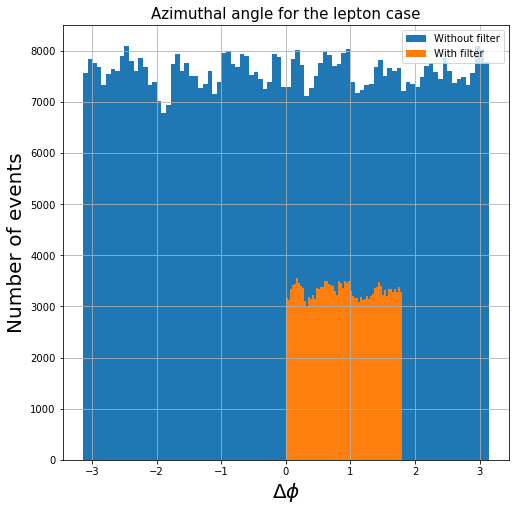

In [16]:
plt.figure(figsize = (8,8))
plt.hist(lep_phi_new_lepton_numpy, bins = 'auto', label = 'Without filter')
plt.hist(filter_lep_phi_new_lepton_numpy, bins = 'auto', label = 'With filter')
plt.title("Azimuthal angle for the lepton case", fontsize = 15)
plt.xlabel("$\Delta\phi$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.legend()
plt.grid()

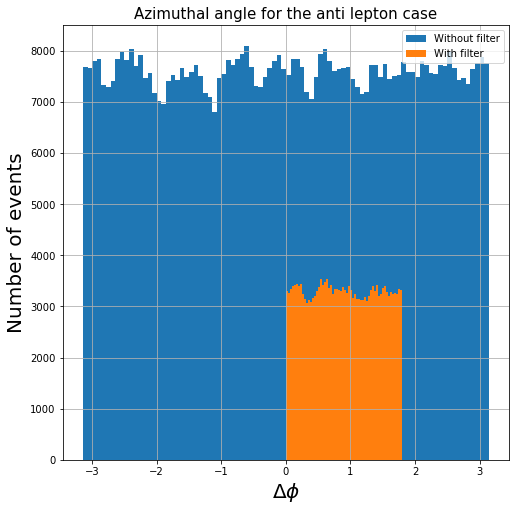

In [17]:
plt.figure(figsize = (8,8))
plt.hist(lep_phi_new_anti_lepton_numpy, bins = 'auto', label = 'Without filter')
plt.hist(filter_lep_phi_new_anti_lepton_numpy, bins = 'auto', label = 'With filter')
plt.title("Azimuthal angle for the anti lepton case", fontsize = 15)
plt.xlabel("$\Delta\phi$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.legend()
plt.grid()

In [18]:
lep_pz_lepton_numpy = np.multiply(lep_pt_new_lepton_numpy, np.sinh(lep_eta_new_lepton_numpy))
lep_pz_anti_lepton_numpy = np.multiply(lep_pt_new_anti_lepton_numpy, np.sinh(lep_eta_new_lepton_numpy))
#
lep_p_lepton_numpy = np.multiply(lep_pt_new_lepton_numpy, np.cosh(lep_eta_new_lepton_numpy))
lep_p_anti_lepton_numpy = np.multiply(lep_pt_new_anti_lepton_numpy, np.cosh(lep_eta_new_anti_lepton_numpy))
#
m_square_lepton_numpy = lep_E_new_lepton_numpy**2 - lep_pz_lepton_numpy**2
m_square_anti_lepton_numpy = lep_E_new_anti_lepton_numpy**2 - lep_pz_anti_lepton_numpy**2

In [19]:
m_square_lepton_list = list(m_square_lepton_numpy)
m_square_anti_lepton_list = list(m_square_anti_lepton_numpy)

# Electron and anti-electron (For DATA_A)

In [20]:
filter_m_square_lepton = []
for i in range(len(m_square_lepton_list)):
    if m_square_lepton_list[i] > 0:
        filter_m_square_lepton.append(m_square_lepton_list[i])
        
filter_m_square_anti_lepton = []
for i in range(len(m_square_anti_lepton_list)):
    if m_square_anti_lepton_list[i] > 0:
        filter_m_square_anti_lepton.append(m_square_anti_lepton_list[i])

In [21]:
filter_m_square_lepton_numpy = np.array(filter_m_square_lepton)
filter_m_square_anti_lepton_numpy = np.array(filter_m_square_anti_lepton)

In [22]:
filter_m_lepton_list = list(np.sqrt(filter_m_square_lepton_numpy))
filter_m_anti_lepton_list = list(np.sqrt(filter_m_square_anti_lepton_numpy))

In [23]:
filter_me_lepton_list = []
for i in range(len(filter_m_lepton_list)):
    if 500000 < filter_m_lepton_list[i] < 700000:
        filter_me_lepton_list.append(filter_m_lepton_list[i])
        
filter_me_anti_lepton_list = []
for i in range(len(filter_m_anti_lepton_list)):
    if 500000 < filter_m_anti_lepton_list[i] < 700000:
        filter_me_anti_lepton_list.append(filter_m_anti_lepton_list[i])

In [24]:
filter_me_lepton_numpy = np.array(filter_me_lepton_list)
filter_me_anti_lepton_numpy = np.array(filter_me_anti_lepton_list)

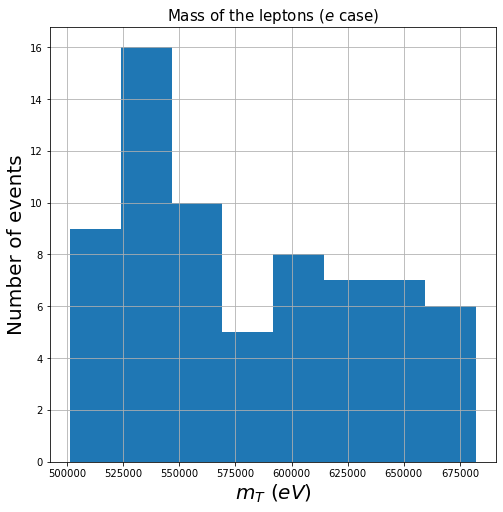

In [25]:
plt.figure(figsize = (8,8))
plt.hist(filter_me_lepton_numpy, bins = 'auto')
plt.title(r"Mass of the leptons ($e$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
#plt.savefig('mass_of_electron.pdf')

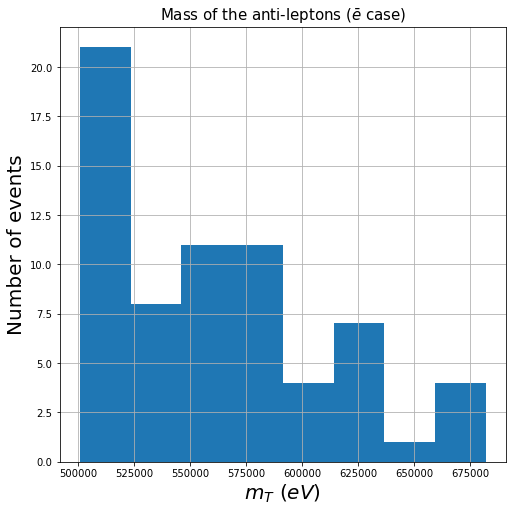

In [26]:
plt.figure(figsize = (8,8))
plt.hist(filter_me_anti_lepton_numpy, bins = 'auto')
plt.title(r"Mass of the anti-leptons ($\bar{e}$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
#plt.savefig('mass_of_anti_electron.pdf')

In [27]:
filter_me_lepton_list_noise = []
for i in range(len(filter_m_lepton_list)):
    if 0 < filter_m_lepton_list[i] < 100000:
        filter_me_lepton_list_noise.append(filter_m_lepton_list[i])
        
filter_me_anti_lepton_list_noise = []
for i in range(len(filter_m_anti_lepton_list)):
    if 0 < filter_m_anti_lepton_list[i] < 100000:
        filter_me_anti_lepton_list_noise.append(filter_m_anti_lepton_list[i])

In [28]:
filter_me_lepton_numpy_noise = np.array(filter_me_lepton_list_noise)
filter_me_anti_lepton_numpy_noise = np.array(filter_me_anti_lepton_list_noise)

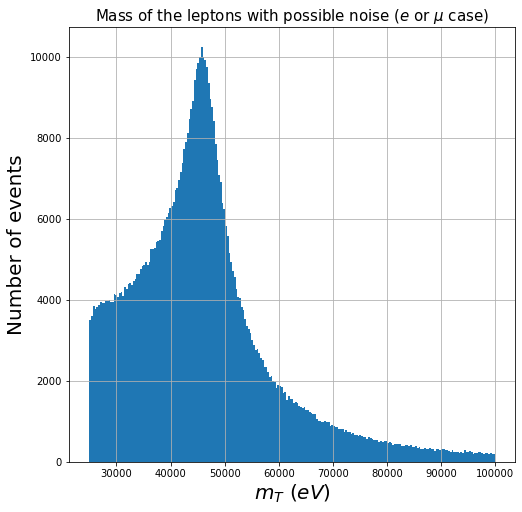

In [29]:
plt.figure(figsize = (8,8))
plt.hist(filter_me_lepton_numpy_noise, bins = 'auto')
plt.title(r"Mass of the leptons with possible noise ($e$ or $\mu$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('mass_of_leptons_with_possible_noise.pdf')

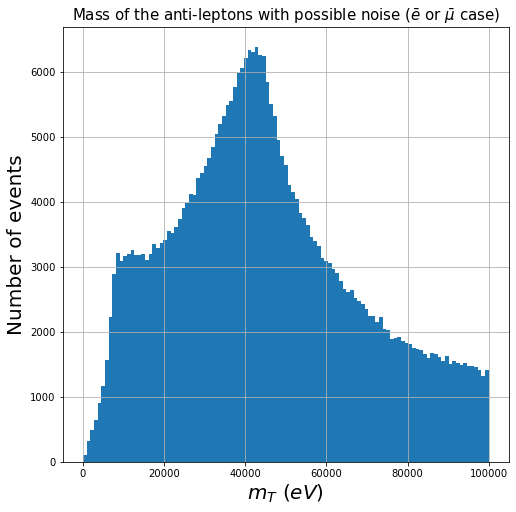

In [30]:
plt.figure(figsize = (8,8))
plt.hist(filter_me_anti_lepton_numpy_noise, bins = 'auto')
plt.title(r"Mass of the anti-leptons with possible noise ($\bar{e}$ or $\bar{\mu}$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('mass_of_anti_leptons_with_possible_noise.pdf')

# Missing part (For DATA_A)

In [31]:
met_et = np.array(treeA.array(['met_et']))
met_phi = np.array(treeA.array(['met_phi']))

In [32]:
transverse_missing_mass_lepton_list = np.sqrt(2*np.multiply(lep_pt_new_lepton_numpy,met_et)*(1-np.cos(met_phi)))
transverse_missing_mass_anti_lepton_list = np.sqrt(2*np.multiply(lep_pt_new_anti_lepton_numpy,met_et)*(1-np.cos(met_phi)))

In [33]:
filter_transverse_missing_mass_lepton_list = []
for i in range(len(transverse_missing_mass_lepton_list)):
    if 0 < transverse_missing_mass_lepton_list[i] < 100000:
        filter_transverse_missing_mass_lepton_list.append(transverse_missing_mass_lepton_list[i])
        
filter_transverse_missing_mass_anti_lepton_list = []
for i in range(len(transverse_missing_mass_anti_lepton_list)):
    if 0 < transverse_missing_mass_anti_lepton_list[i] < 100000:
        filter_transverse_missing_mass_anti_lepton_list.append(transverse_missing_mass_anti_lepton_list[i])

In [34]:
filter_transverse_missing_mass_lepton_array = np.array(filter_transverse_missing_mass_lepton_list)
filter_transverse_missing_mass_anti_lepton_array = np.array(filter_transverse_missing_mass_anti_lepton_list)

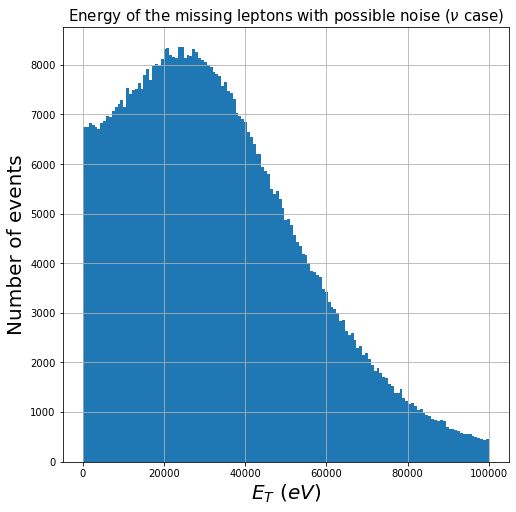

In [35]:
plt.figure(figsize = (8,8))
plt.hist(filter_transverse_missing_mass_lepton_array, bins = 'auto')
plt.title(r"Energy of the missing leptons with possible noise ($\nu$ case)", fontsize = 15)
plt.xlabel("$E_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('energy_of_neutrino_with_possible_noise.pdf')

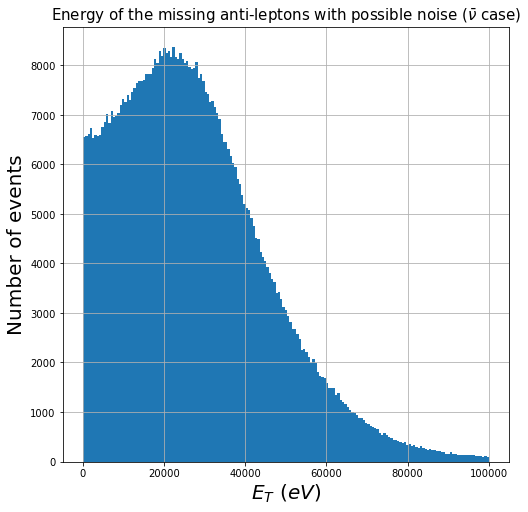

In [36]:
plt.figure(figsize = (8,8))
plt.hist(filter_transverse_missing_mass_anti_lepton_array, bins = 'auto')
plt.title(r"Energy of the missing anti-leptons with possible noise ($\bar{\nu}$ case)", fontsize = 15)
plt.xlabel("$E_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('energy_of_anti_neutrino_with_possible_noise.pdf')

In [37]:
filter_transverse_missing_mass_lepton_list_2 = []
for i in range(len(transverse_missing_mass_lepton_list)):
    if 0 < transverse_missing_mass_lepton_list[i] < 10:
        filter_transverse_missing_mass_lepton_list_2.append(transverse_missing_mass_lepton_list[i])
        
filter_transverse_missing_mass_anti_lepton_list_2 = []
for i in range(len(transverse_missing_mass_anti_lepton_list)):
    if 0 < transverse_missing_mass_anti_lepton_list[i] < 10:
        filter_transverse_missing_mass_anti_lepton_list_2.append(transverse_missing_mass_anti_lepton_list[i])

In [38]:
filter_transverse_missing_mass_lepton_array_2 = np.array(filter_transverse_missing_mass_lepton_list_2)
filter_transverse_missing_mass_anti_lepton_array_2 = np.array(filter_transverse_missing_mass_anti_lepton_list_2)

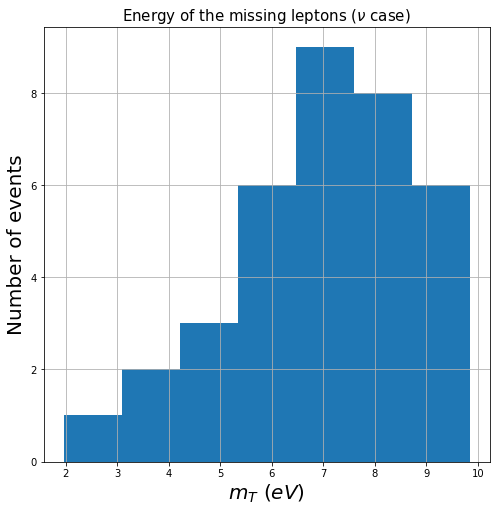

In [39]:
plt.figure(figsize = (8,8))
plt.hist(filter_transverse_missing_mass_lepton_array_2, bins = 'auto')
plt.title(r"Energy of the missing leptons ($\nu$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
#plt.savefig('mass_of_neutrino.pdf')

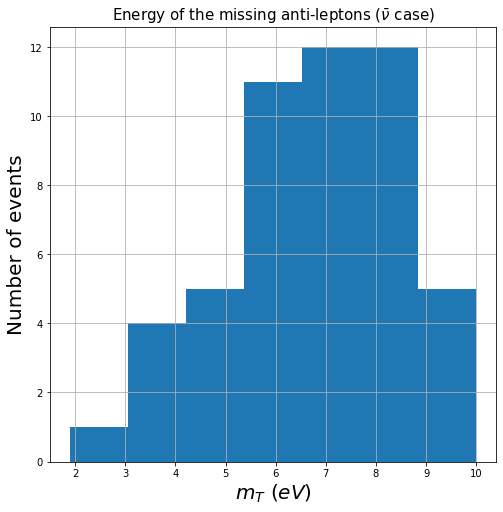

In [40]:
plt.figure(figsize = (8,8))
plt.hist(filter_transverse_missing_mass_anti_lepton_array_2, bins = 'auto')
plt.title(r"Energy of the missing anti-leptons ($\bar{\nu}$ case)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
#plt.savefig('mass_of_anti_neutrino.pdf')

# Mass dilepton system

In [41]:
dilepton_mass_square = 2*np.multiply(lep_pt_new_lepton_numpy, lep_pt_new_anti_lepton_numpy)*(np.cosh(lep_eta_new_lepton_numpy-lep_eta_new_anti_lepton_numpy) - np.cos(lep_phi_new_lepton_numpy - lep_phi_new_anti_lepton_numpy))
dilepton_mass = np.sqrt(dilepton_mass_square)
dilepton_mass_list = list(dilepton_mass)

In [42]:
filter_dilepton_mass_list = []
for i in range(len(dilepton_mass_list)):
    if 80000 < dilepton_mass_list[i] < 100000:
        filter_dilepton_mass_list.append(dilepton_mass_list[i])

In [43]:
filter_dilepton_mass_array = np.array(filter_dilepton_mass_list)

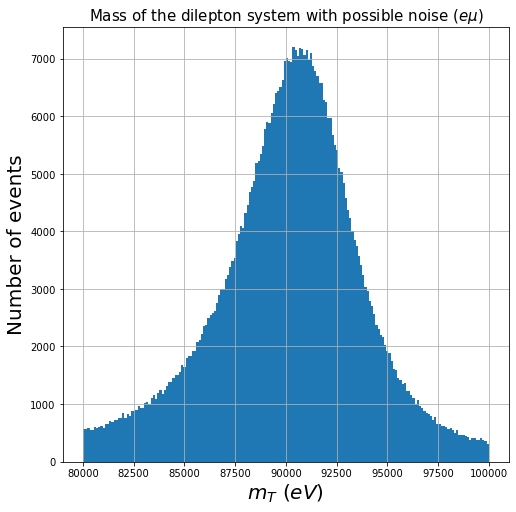

In [44]:
plt.figure(figsize = (8,8))
plt.hist(filter_dilepton_mass_array, bins = 'auto')
plt.title(r"Mass of the dilepton system with possible noise ($e\mu$)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('mass_of_two_leptons.pdf')

In [45]:
total_mass = np.add(dilepton_mass,transverse_missing_mass_lepton_list)
total_mass_list = list(total_mass)

In [46]:
filter_total_mass_list = []
for i in range(len(total_mass_list)):
    if 60000 < total_mass_list[i] < 180000:
        filter_total_mass_list.append(total_mass_list[i])

In [47]:
total_filter_mass_array = np.array(filter_total_mass_list)

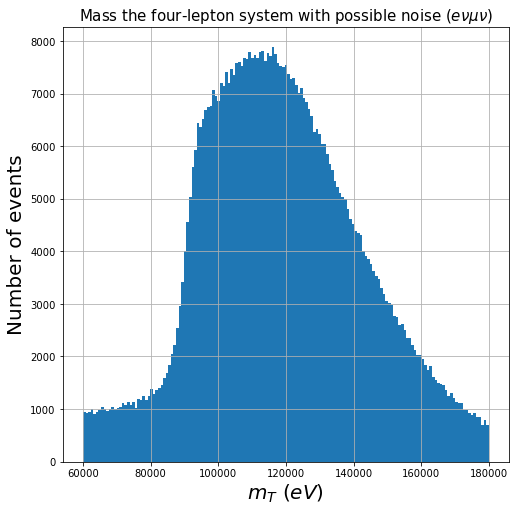

In [48]:
plt.figure(figsize = (8,8))
plt.hist(total_filter_mass_array, bins = 'auto')
plt.title(r"Mass the four-lepton system with possible noise ($e\nu\mu\nu$)", fontsize = 15)
plt.xlabel("$m_T\ (eV)$", fontsize = 20)
plt.ylabel("Number of events", fontsize = 20)
plt.grid()
plt.savefig('mass_of_four_leptons.pdf')